![Banner](img/banner.png)

# **Actividad No.2:** Mínimos locales

***Matemáticas para Machine Learning***.

**Semana 5 - Lección 2:** Mínimos locales y globales de una función.

**Profesor:** *Fernando Lozano* - **Autor Notebook:** *Sergio David Salazar Isairias*

# Introducción

## Descripción

El presente *jupyter notebook* contine todo el material para el desarrollo de la actividad 2 de la semana 5 del curso ***Matemáticas para Machine Learning***, correspondiente a la lección 2: Mínimos locales. En este se utilizará el conocimiento adquirido sobre gradiente y Hessiana para identificar mínimos locales..

**Objetivos de Aprendizaje:**

*   Identificar condiciones necesarias de primer y segundo orden de mínimos locales.

## Metodología

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o esten solo igualadas a None, complete la asignación).

# Teoría

Optimizar una función es una tarea con una amplia gama de aplicaciones, entre las que se encuentra el entrenamiento de modelos predictivos. En dicha área se estiman los parámetros del modelo por medio de algoritmos de minimización de error. Se formula una función de error, por ejemplo: error cuadrático medio o error medio absoluto, luego se utiliza un algoritmo para obtener los parámetros que garantizan la mejor predicción. 

En espacios controlados y con una serie de supuestos es posible concluir si los parámetros estimados son los mejores o no. Por ejemplo, en ejercicios de regresión lineal donde los errores se distribuyen normal, se garantiza que los parámetros estimados por mínimos cuadrados son los óptimos. Lastimosamente, en la práctica abundan aquellos problemas en los que no es posible garantizar optimalidad. No obstante, hay propiedades que permiten identificar buenas soluciones, i.e. estimaciones, entre estas se encuentra las condiciones de mínimo local, las cuales se revisan en la presente actividad.

**Mínimo local**

Sea $x^*\in \mathbf{R}^{n}$, $x^*$ es un mínimo local de $f$ en $\mathbf{R}^{n}$ si existe $\epsilon>0$ tal que $f(x)\geq f(x^*)$       $\forall x:||x-x^{*}||<\epsilon$. Es decir, un punto $x^{*}$ es un mínimo local si existe un círculo de radio $\epsilon$ en el que al evaluar la función en puntos diferentes de $x^{*}$, el resultado es mayor o igual a $f(x^{*})$.

# Inicialización

In [1]:
# UTILIDADES =================================
# Correr una única vez por sesión ============
from maiautils import MaiaUtils
ipython = get_ipython()
mutils = MaiaUtils(ipython) 
# ============================================

In [2]:
from visualizacion import *

import numpy as np
import scipy
import plotly.graph_objects as go

In [3]:
# Cambiar configuración de informe de errores
mutils.toggle_traceback()

## Ejemplo 1

Sea $f(x,y) = x^{2} + 2y^{2}+\frac{1}{2}x + 5$, se desea encontrar el mínimo local de $f$, para ello se calcula el gradiente. $\nabla f(x,y) = [2x + \frac{1}{2},4y ]^T$. Luego se plantea el siguiente sistema de ecuaciones.

$$\begin{align*}
2x + \frac{1}{2} &= 0          &  \Rightarrow x&=-\frac{1}{4}       \\
4y &= 0      &  \Rightarrow y&=0 
\end{align*}$$

El punto $(-0.25,0)$ es un punto crítico, para concluir si es un mínimo o no, se debe utilizar la condición de segundo orden, es decir, comprobar si la Hessiana de $f$ es positiva semidefinida.
$$\nabla^{2}f =
  \left(
  \begin{array}{cc} 
   2 & 0 \\
   0 & 4
  \end{array}
  \right)$$

La Hessiana de $f$ es una matriz diagonal, toda matriz diagonal es positiva definida. Entonces se cumple la condición de segundo orden, es decir, $(-0.25,0)$ es un mínimo local. Además, la Hessiana es positiva definida para todo $(x,y)\in \mathbf{R}^{2}$. Entonces $(-0.25,0)$ es un mínimo global.

### Visualización

In [4]:
def f(x,y):
    return x**2 + 2*y**2 + 0.5*x + 5

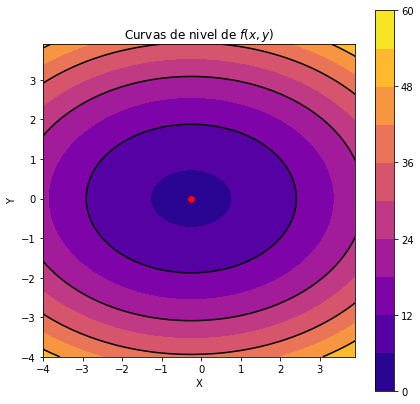

In [6]:
x,y = np.meshgrid(np.arange(-4,4,.1),np.arange(-4,4,.1))
z = f(x,y)
fig,ax = plt.subplots(figsize=(7,7))
ax.set_aspect('equal','box')

CS = ax.contourf(x, y, z, 8,cmap='plasma')
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='Black')

cbar = fig.colorbar(CS)
plt.plot(-1/4,0,'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curvas de nivel de $f(x,y)$')
plt.show()

dibujar3D([-4,4],[-4,4],f,title="$f(x,y)$")

Sea $x^{*}=(-0.25,0)$ es el mínimo global de $f$, ahora, ¿qué pasa si se restringe la función? Considere la restricción $y+x=1$. El punto $x^{*}$ no cumple dicha condición, por lo que hay que encontrar un mínimo local que satisfaga la restricción.

Utilizando cálculo multivariado se identifica que el mínimo local de $f(x,y)$ sobre la recta $x+y=1$ es $(0.75,0.25)$.

### Visualización

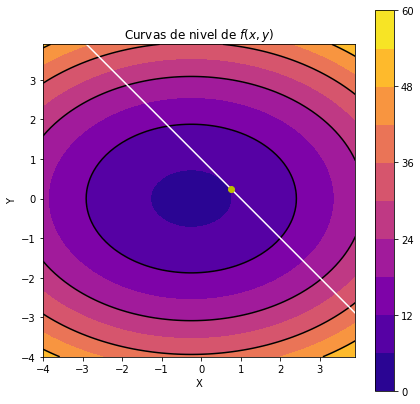

In [7]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_aspect('equal','box')

CS = ax.contourf(x, y, z, 8,cmap='plasma')
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='Black')

cbar = fig.colorbar(CS)
x_vec = np.arange(-2.9,4,.1)
y_vec = 1-x_vec
plt.plot(x_vec,y_vec,'w')
plt.plot(3/4,1/4,'yo')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curvas de nivel de $f(x,y)$')
plt.show()

## Ejemplo 2

El ejemplo anterior ilustra un problema sencillo de minimización de funciones, pues existen métodos exactos que garantizan la optimizalidad del mínimo. Ahora analicemos una función más compleja. 

Considere la función *gamma*.
$$\gamma(x,y)= 3(1-x)^{2}e^{-x^{2}-(y+1)^{2}} - 10(\frac{1}{4}x-x^{3}-y^{5})e^{-x^{2}-y^{2}} - \frac{1}{3}e^{-(x+1)^{2}-y^{2}}$$

¿Es posible identificar un mínimo analíticamente? Para responder a dicha pregunta generemos una gráfica.

In [8]:
def gamma(x,y):
    return 3*(1-x)**2*np.exp(-(x)**2-(y+1)**2)- 10*(x/5-x**3-y**5)*np.exp(-(x)**2-(y)**2)-1/3*np.exp(-(x+1)**2-(y)**2)

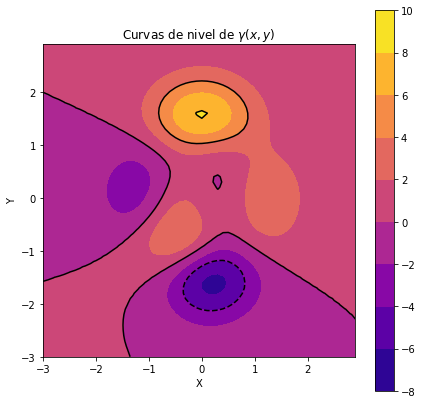

In [9]:
x,y = np.meshgrid(np.arange(-3,3,.1),np.arange(-3,3,.1))
z = gamma(x,y)
fig,ax = plt.subplots(figsize=(7,7))
ax.set_aspect('equal','box')

CS = ax.contourf(x, y, z, 8,cmap='plasma')
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='Black')

cbar = fig.colorbar(CS)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curvas de nivel de $\gamma(x,y)$')
plt.show()
dibujar3D([-4,4],[-4,4],gamma)

Como se observa, la función tiene más de un mínimo local, lo cual aumenta la complejidad del ejercicio, pues analíticamente no se puede garantizar que el parámetro estimado ($x$) minimice la función globalmente y mucho menos afirmar que no hay otros minimos locales. Por ejemplo, para funciones de $3$ variables en adelante no es posible graficar la función, por lo que hay se deben utilizar algoritmos de optimización, lo cual se verá en las siguientes semanas.

# Problemas

## Mínimo local

Realice una función que compruebe si un punto $(x,y)^{*}$ es mínimo local de $f(x,y)$ para un cuadrado centrado en $(x,y)^{*}$ y de lado $2\epsilon$.

In [18]:
def minimo_local(P,F,epsilon,n=10):
    """ 
    Evalua los puntos de la región [x*-epsilon,x*+epsilon]X[y*-epsilon,y*+epsilon],
    luego identifica si hay un punto (x,y) cuya función objetivo es menor a f(x*,y*).
    ___________________________________
    Entrada:
    P: [1D-array] Valores del punto (x*,*)
    F: [function] función a evaluar
    epsilon: [float] longitud de la mitad del lado del cuadrado.
    n: [int] número de puntos a evaluar
    ___________________________________
    Salida:
    otro_punto : [Boolean] Indica si hay un mejor candidato a mínimo local en la región.
    """
    # Candidato a mínimo
    F_P = F(P[0],P[1])
    
    # Limites de la grilla
    x_lims = [P[0]-epsilon,P[0]+epsilon]
    y_lims = [P[1]-epsilon,P[1]+epsilon]
    
    # Grilla
    X, Y = np.linspace(*x_lims, num=n), np.linspace(*y_lims, num=n)
    X, Y = np.meshgrid(X, Y)
    
    # Evalua
    Z = F(X,Y)
    
    # Parámetros del ciclo
    i=0
    otro_punto = False
    
    # Ciclo que itera en el eje Y.
    while (i<n and otro_punto==False):
        
        # Ciclo que itera en el eje X.
        j = 0
        while (j<n and otro_punto==False):
            
            # Condición de mínimo local.
            
            # =====================================================
            # COMPLETAR ===========================================
            # Cambie False por la condición correcta de mínimo local.
            #
            if Z[i][j] < F_P:  
                otro_punto = True
            # =====================================================
            j += 1
        i +=1
    return otro_punto


In [19]:
minimo_local([-0.25,0],f,10)

False

In [20]:
mutils.calificar_minimo_local(minimo_local)

__________________________________
Verificando errores...




Sin Errores
__________________________________


## Condición de segundo orden

Realice una función que reciba la matriz Hessiana de una función de $2$ variables y retorne True si es definida positiva y Falso en caso contrario.

In [21]:
def definida_positiva(A):
    """ 
    Identifica si la matriz A es definida positiva 
    ___________________________________
    Entrada:
    A: [2D-array] Matriz Hessiana 2x2.
    ___________________________________
    Salida:
    positiva: [Boolean] True si A es definida positiva, False en caso contrario.
    """
    # =====================================================
    # COMPLETAR ===========================================
    # Incluya el código necesario para actualizar el valor de la variable
    # 'positiva' según la matriz A. Utilice cualquier criterio para identificar
    # si A es positiva definida.
    #
    positiva = np.all(np.linalg.eigvals(A) > 0)
    # =====================================================
    return positiva

In [22]:
A = np.array([[0,0],[1,0]])
definida_positiva(A)

False

In [23]:
mutils.calificar_definida_positiva(definida_positiva)

__________________________________
Verificando errores...




Sin Errores
__________________________________
